In [149]:
import matplotlib.pyplot as plt
import numpy as np

In [179]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [180]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0.

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p
  
  def update(self, x):
    self.N += 1
    self.p_estimate = self.p_estimate + (1 / self.N) * (x - self.p_estimate)

In [195]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits])
  print("optimal j: ", optimal_j)

  for i in range(NUM_TRIALS):

    # Use epsilon greedy to select the next bandit
    if np.random.random() < EPS / (np.log(i+10)):
      num_times_explored += 1
      j = np.random.choice(range(len(bandits)))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])
    
    if j == optimal_j:
      num_optimal += 1
    

    # Pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # Update the reward log
    rewards[i] = x

    # Update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)


  # Print mean estimates for each bandit
  for b in bandits:
    print("mean estimate: ", b.p_estimate)
  
  # Print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j:  2
mean estimate:  0.17516629711751666
mean estimate:  0.4776536312849162
mean estimate:  0.7485961166816789
total reward earned: 74407.0
overall win rate: 0.74407
num_times_explored: 943
num_times_exploited: 99057
num times selected optimal bandit: 98833


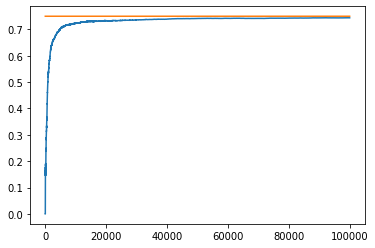

In [196]:
experiment()